# COVID-19 Death Rate Analysis by Age Group and Race/Ethnicity
This notebook analyzes the COVID-19 public surveillance dataset provided by the CDC. We focus on computing the death rate based on:
- Age Group
- Race/Ethnicity

Rows with unknown, missing, or invalid values in the relevant fields are excluded.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

# Visualization settings
sns.set(style="whitegrid")

In [2]:
# Define data source and filtering query 
BASE_URL = "https://data.cdc.gov/resource/vbim-akqf.json"
LIMIT = 50000
offset = 0
all_data = []
params = {
    "$limit": LIMIT,
    "$offset": offset,
    "$select": "age_group, race_ethnicity_combined, death_yn,cdc_report_dt,current_status",
    "$where": "age_group NOT IN ('Missing', 'NA') AND race_ethnicity_combined NOT IN ('Unknown', 'Missing', 'NA') AND death_yn IN ('Yes', 'No') AND cdc_report_dt <= '2020-04-30T00:00:00.000' AND current_status IN ('Laboratory-confirmed case')"
}

# Fetch paginated data
while True:
    print(f"Fetching offset: {offset}")
    params["$offset"] = offset
    response = requests.get(BASE_URL, params=params)
    data = response.json()
    print(len(data))
    if len(data)<LIMIT:
        break
    all_data.extend(data)
    offset += LIMIT

# Convert to DataFrame
df = pd.DataFrame(all_data)
df.head()

Fetching offset: 0
50000
Fetching offset: 50000
50000
Fetching offset: 100000
48342


,age_group,race_ethnicity_combined,death_yn,cdc_report_dt,current_status
0,20 - 29 Years,"Multiple/Other, Non-Hispanic",No,2020-01-01T00:00:00.000,Laboratory-confirmed case
1,80+ Years,"White, Non-Hispanic",Yes,2020-01-01T00:00:00.000,Laboratory-confirmed case
2,50 - 59 Years,Hispanic/Latino,No,2020-01-01T00:00:00.000,Laboratory-confirmed case
3,10 - 19 Years,"White, Non-Hispanic",No,2020-01-02T00:00:00.000,Laboratory-confirmed case
4,60 - 69 Years,"American Indian/Alaska Native, Non-Hispanic",Yes,2020-01-02T00:00:00.000,Laboratory-confirmed case


In [3]:
# Compute death rate by age group
age_death = df.groupby(["age_group", "death_yn"]).size().unstack(fill_value=0)
age_death["Death Rate"] = age_death["Yes"] / (age_death["Yes"] + age_death["No"])
age_death = age_death.sort_values("Death Rate", ascending=False)
age_death

death_yn,No,Yes,Death Rate
age_group,,,
80+ Years,3739,11357,0.752318
70 - 79 Years,9372,9180,0.494825
60 - 69 Years,6186,3156,0.337829
50 - 59 Years,9995,2291,0.186472
40 - 49 Years,15908,1354,0.078438
30 - 39 Years,11376,487,0.041052
0 - 9 Years,866,8,0.009153
20 - 29 Years,12511,112,0.008873
10 - 19 Years,2092,10,0.004757


C:\Users\Dell\AppData\Local\Temp\ipykernel_22468\3810961960.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_death.index, y=age_death["Death Rate"], palette="Reds")


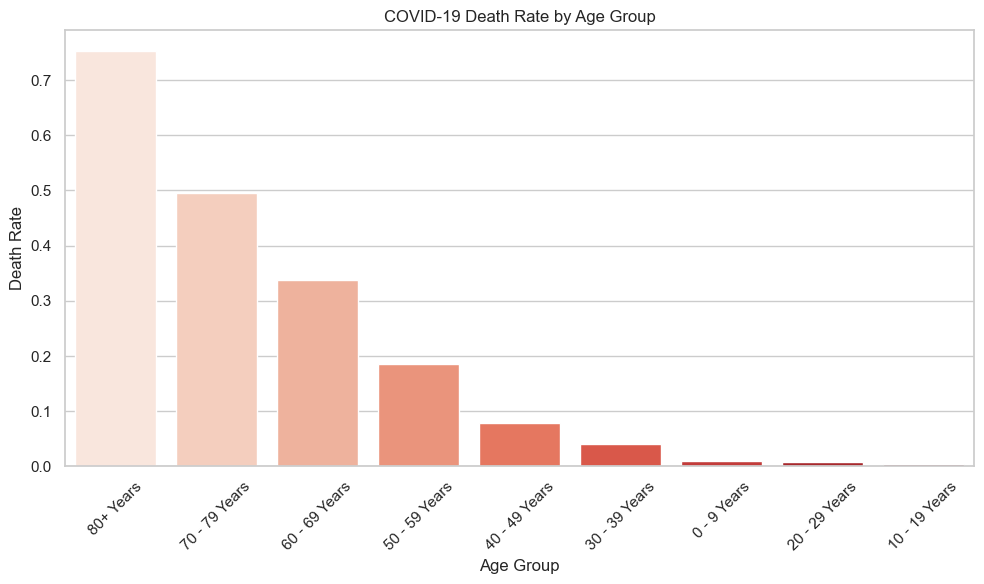

In [4]:
# Plot death rate by age group
plt.figure(figsize=(10, 6))
sns.barplot(x=age_death.index, y=age_death["Death Rate"], palette="Reds")
plt.title("COVID-19 Death Rate by Age Group")
plt.ylabel("Death Rate")
plt.xlabel("Age Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
# Compute death rate by race/ethnicity
race_death = df.groupby(["race_ethnicity_combined", "death_yn"]).size().unstack(fill_value=0)
race_death["Death Rate"] = race_death["Yes"] / (race_death["Yes"] + race_death["No"])
race_death = race_death.sort_values("Death Rate", ascending=False)
race_death

death_yn,No,Yes,Death Rate
race_ethnicity_combined,,,
"Asian, Non-Hispanic",2645,1294,0.328510
"Black, Non-Hispanic",16021,6838,0.299138
"White, Non-Hispanic",30797,12862,0.294601
Hispanic/Latino,18599,5922,0.241507
"Multiple/Other, Non-Hispanic",3161,829,0.207769
"American Indian/Alaska Native, Non-Hispanic",618,161,0.206675
"Native Hawaiian/Other Pacific Islander, Non-Hispanic",204,49,0.193676


C:\Users\Dell\AppData\Local\Temp\ipykernel_22468\3402815904.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=race_death.index, y=race_death["Death Rate"], palette="Purples")


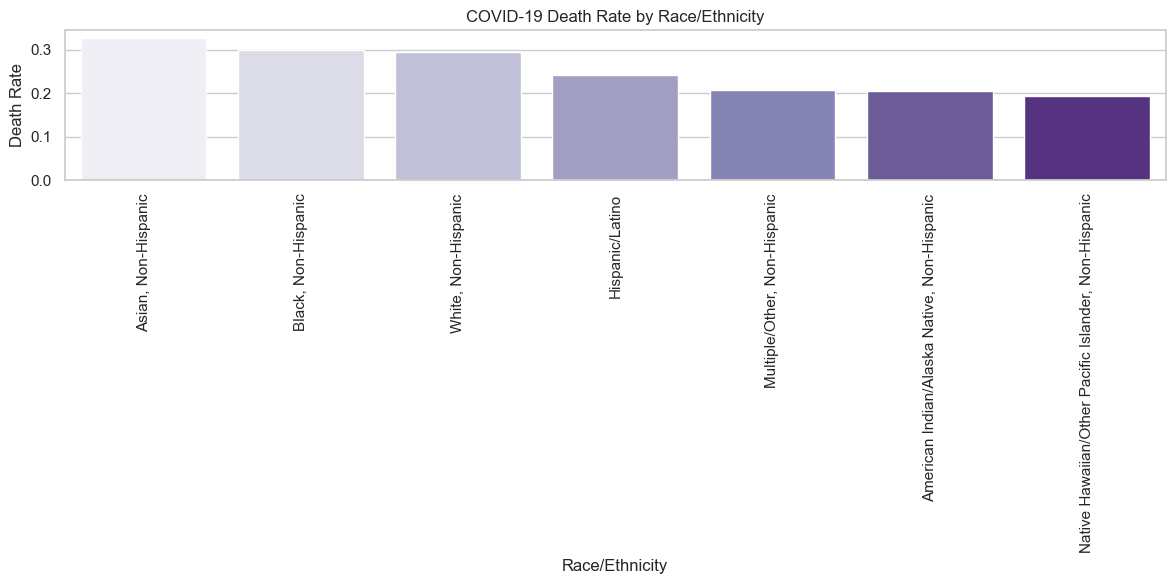

In [6]:
# Plot death rate by race/ethnicity
plt.figure(figsize=(12, 6))
sns.barplot(x=race_death.index, y=race_death["Death Rate"], palette="Purples")
plt.title("COVID-19 Death Rate by Race/Ethnicity")
plt.ylabel("Death Rate")
plt.xlabel("Race/Ethnicity")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()